# Imports

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme()
import yfinance as yf

# A first look at the data

In [2]:
stocks = pd.read_excel("trading_data/congress-trading-all.xlsx",
                       parse_dates=["Traded", "Filed", "Quiver_Upload_Time", "last_modified"])
stocks.describe(include="all")

,Ticker,TickerType,Company,Traded,Transaction,Trade_Size_USD,Status,Subholding,Description,Name,Filed,Party,District,Chamber,Comments,Quiver_Upload_Time,excess_return,State,last_modified
count,46363,33426,46362,46363,46363,46363,46273,27336,4324,46363,46363,46363,36310,46363,813,46363,43858.000000,46363,46279
unique,3962,17,6467,NaN,5,446,2,527,2327,341,NaN,3,199,2,196,NaN,NaN,50,NaN
top,MSFT,ST,MICROSOFT CORPORATION,NaN,Purchase,"$1,001 - $15,000",NEW,THOMAS C MACARTHUR AND DEBORAH A MACARTHUR,DIVIDEND REINVESTMENT,Thomas Macarthur,NaN,R,NJ03,House,R,NaN,NaN,New Jersey,NaN
freq,764,24088,634,NaN,22956,34061,36220,1841,255,2758,NaN,24474,2758,36310,184,NaN,NaN,6042,NaN
mean,NaN,NaN,NaN,2019-03-07 19:01:29.372991744,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-10 10:20:39.419364608,NaN,NaN,NaN,NaN,2021-03-02 02:14:59.009986304,-14.978912,NaN,2023-11-03 08:04:28.216685824
min,NaN,NaN,NaN,2012-02-27 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2014-01-03 00:00:00,NaN,NaN,NaN,NaN,2020-07-26 00:00:00,-312.559148,NaN,2023-08-28 00:00:00
25%,NaN,NaN,NaN,2016-12-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2017-02-08 00:00:00,NaN,NaN,NaN,NaN,2020-07-26 00:00:00,-83.212058,NaN,2023-11-16 00:00:00
50%,NaN,NaN,NaN,2019-05-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2019-09-05 00:00:00,NaN,NaN,NaN,NaN,2020-07-26 00:00:00,-27.356261,NaN,2023-11-16 00:00:00
75%,NaN,NaN,NaN,2021-02-19 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-15 00:00:00,NaN,NaN,NaN,NaN,2021-06-18 00:00:00,16.004133,NaN,2023-11-16 00:00:00
max,NaN,NaN,NaN,2024-02-21 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2024-02-23 00:00:00,NaN,NaN,NaN,NaN,2024-02-26 00:00:00,9728.684748,NaN,2024-02-26 00:00:00


In [3]:
stocks.head()

,Ticker,TickerType,Company,Traded,Transaction,Trade_Size_USD,Status,Subholding,Description,Name,Filed,Party,District,Chamber,Comments,Quiver_Upload_Time,excess_return,State,last_modified
0,PANW,OP,"PALO ALTO NETWORKS, INC.",2024-02-21,Purchase,"$100,001 - $250,000",NEW,NaN,PURCHASED 20 CALL OPTIONS WITH A STRIKE PRICE ...,Nancy Pelosi,2024-02-23,D,CA11,House,NaN,2024-02-26,18.186604,California,2024-02-26
1,GLA,HN,"RAC OPPORTUNITY FUND II, LP",2024-02-16,Purchase,"$1,001 - $15,000",NEW,2012 TRUST,CAPITAL CALL FOR RAC OPPORTUNITY FUND II LP,Max Miller,2024-02-16,R,OH07,House,NaN,2024-02-20,NaN,Ohio,2024-02-20
2,PANW,OP,"PALO ALTO NETWORKS, INC.",2024-02-12,Purchase,"$500,001 - $1,000,000",NEW,NaN,PURCHASED 50 CALL OPTIONS WITH A STRIKE PRICE ...,Nancy Pelosi,2024-02-23,D,CA11,House,NaN,2024-02-26,-16.570903,California,2024-02-26
3,"GLAS FUNDS, LP",HN,"NEW WATER CAPITAL PARTNERS II, LP",2024-02-07,Purchase,$833.71,NEW,2012 TRUST,"CAPITAL CALL FOR NEW WATER CAPITAL PARTNERS, I...",Max Miller,2024-02-09,R,OH07,House,NaN,2024-02-12,NaN,Ohio,2024-02-12
4,SPG,ST,"SIMON PROPERTY GROUP, INC. COMMON STOCK",2024-02-02,Purchase,"$1,001 - $15,000",NEW,CHARLES SCHWAB MINOR ROTH IRA,THIS TRANSACTION WAS MADE BY LILIANNA SPARTZ'S...,Victoria Spartz,2024-02-15,R,IN05,House,NaN,2024-02-16,5.960948,Indiana,2024-02-16


In [4]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46363 entries, 0 to 46362
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Ticker              46363 non-null  object        
 1   TickerType          33426 non-null  object        
 2   Company             46362 non-null  object        
 3   Traded              46363 non-null  datetime64[ns]
 4   Transaction         46363 non-null  object        
 5   Trade_Size_USD      46363 non-null  object        
 6   Status              46273 non-null  object        
 7   Subholding          27336 non-null  object        
 8   Description         4324 non-null   object        
 9   Name                46363 non-null  object        
 10  Filed               46363 non-null  datetime64[ns]
 11  Party               46363 non-null  object        
 12  District            36310 non-null  object        
 13  Chamber             46363 non-null  object    

## Ticker and Company

In [33]:
print(stocks.Ticker.value_counts().head(10))
print("...")
print(stocks.Ticker.value_counts().tail(10))

Ticker
MSFT    764
AAPL    711
AMZN    319
DIS     278
FB      254
JNJ     251
T       248
XOM     238
INTC    238
NVDA    235
Name: count, dtype: int64
...
Ticker
VSCO       1
PGX        1
NRDY       1
GAMR       1
DUKH       1
FMAT       1
ANF        1
FV         1
CARDONA    1
GEM        1
Name: count, dtype: int64


Top 10 companies by number of trades:
1. MSFT (Microsoft)
2. AAPL (Apple)
3. AMZN (Amazon)
4. DIS (Disney)
5. FB (Meta)
6. JNJ (Johnson & Johnson)
7. T (AT&T)
8. XOM (Exxon-Mobil)
9. INTC (Intel)
10. NVDA (Nvidia)

In [5]:
# The Ticker column is going to be more useful than the Company column
# But the data probably needs cleaning in general
stocks[stocks.Ticker == "MSFT"]["Company"].unique()

array(['MICROSOFT CORPORATION - COMMON STOCK', 'MICROSOFT CORPORATION',
       'Microsoft Corporation - Common Stock', 'Microsoft Corp',
       'FORWARD CONTRACT', 'Microsoft Corporation',
       'WHEELING, WV. THE STOCK IS PRIVATELY TRADED. MICROSOFT CORPORATION',
       'Microsoft Corporation (NASDAQ)'], dtype=object)

25% of ticker symbols occur only once, and 75% occur at most than 10 times:

In [11]:
stocks.Ticker.value_counts().describe()

count    3962.000000
mean       11.701918
std        30.030024
min         1.000000
25%         1.000000
50%         3.000000
75%        10.000000
max       764.000000
Name: count, dtype: float64

## Ticker Type

In [12]:
stocks.TickerType.value_counts(dropna=False)

TickerType
ST                  24088
NaN                 12937
Stock                7701
OP                    567
Stock Option          430
Other Securities      349
OT                    102
CS                     66
GS                     58
AB                     19
ET                     13
HN                      9
Corporate Bond          9
PS                      4
Cryptocurrency          4
OI                      3
OL                      3
SA                      1
Name: count, dtype: int64

This field was treated differently based on Congressional chamber, with members of the House using two-letter codes, and Senators using full words.

In [158]:
print(stocks.groupby("TickerType")["Chamber"].value_counts())

TickerType        Chamber
AB                House         19
CS                House         66
Corporate Bond    Senate         9
Cryptocurrency    Senate         4
ET                House         13
GS                House         58
HN                House          9
OI                House          3
OL                House          3
OP                House        567
OT                House        102
Other Securities  Senate       349
PS                House          4
SA                House          1
ST                House      24088
Stock             Senate      7701
Stock Option      Senate       430
Name: count, dtype: int64


1. `Stock` and `ST` are synonyms for stocks. These are the records that we're primarily interested in, since buying a stock is a strong signal of interest in a company and/or confidence in its future performance. Note that `Stock` appears to contain some ETFs and mutual funds as well:

In [16]:
stocks[stocks.TickerType == 'Stock'].head()

,Ticker,TickerType,Company,Traded,Transaction,Trade_Size_USD,Status,Subholding,Description,Name,Filed,Party,District,Chamber,Comments,Quiver_Upload_Time,excess_return,State,last_modified
14,VIG,Stock,Vanguard Div Appreciation ETF,2024-01-26,Sale (Partial),"$15,001 - $50,000",New,NaN,NaN,"Graham, Lindsey",2024-01-26,R,NaN,Senate,NaN,2024-01-26,-0.949906,South Carolina,2024-01-26
15,USFR,Stock,Wisdomtree Floating Rate Treasury Fund,2024-01-26,Purchase,"$15,001 - $50,000",New,NaN,NaN,"Graham, Lindsey",2024-01-26,R,NaN,Senate,NaN,2024-01-26,-3.849323,South Carolina,2024-01-26
41,RPM,Stock,RPM International Inc. Common Stock,2024-01-24,Sale (Partial),"$15,001 - $50,000",New,NaN,NaN,"Sullivan, Dan",2024-02-09,R,NaN,Senate,Third Party investment professional manages po...,2024-02-10,1.396490,Alaska,2024-02-10
130,CLF,Stock,Cleveland-Cliffs Inc. Common Stock,2024-01-22,Sale (Partial),"$15,001 - $50,000",New,NaN,NaN,"Tuberville, Tommy",2024-02-14,R,NaN,Senate,NaN,2024-02-15,9.678128,Alabama,2024-02-15
132,AON,Stock,Aon plc Class A Ordinary Shares (Ireland),2024-01-22,Sale (Full),"$1,001 - $15,000",New,NaN,NaN,"Tuberville, Tommy",2024-02-14,R,NaN,Senate,NaN,2024-02-15,-1.944337,Alabama,2024-02-15


In [17]:
stocks[stocks.TickerType == 'ST'].head()

,Ticker,TickerType,Company,Traded,Transaction,Trade_Size_USD,Status,Subholding,Description,Name,Filed,Party,District,Chamber,Comments,Quiver_Upload_Time,excess_return,State,last_modified
4,SPG,ST,"SIMON PROPERTY GROUP, INC. COMMON STOCK",2024-02-02,Purchase,"$1,001 - $15,000",NEW,CHARLES SCHWAB MINOR ROTH IRA,THIS TRANSACTION WAS MADE BY LILIANNA SPARTZ'S...,Victoria Spartz,2024-02-15,R,IN05,House,NaN,2024-02-16,5.960948,Indiana,2024-02-16
5,SPG,ST,"SIMON PROPERTY GROUP, INC. COMMON STOCK",2024-02-02,Purchase,"$50,001 - $100,000",NEW,CHARLES SCHWAB ROTH IRA,THIS TRANSACTION WAS MADE BY JASON SPARTZ'S RO...,Victoria Spartz,2024-02-15,R,IN05,House,NaN,2024-02-16,5.960948,Indiana,2024-02-16
6,SPG,ST,"SIMON PROPERTY GROUP, INC. COMMON STOCK",2024-02-02,Purchase,"$1,001 - $15,000",NEW,CHARLES SCHWAB MINOR ROTH IRA,THIS TRANSACTION WAS MADE BY INGRID SPARTZ'S M...,Victoria Spartz,2024-02-15,R,IN05,House,NaN,2024-02-16,5.960948,Indiana,2024-02-16
9,JPM,ST,JP MORGAN CHASE & CO. COMMON STOCK,2024-01-31,Purchase,"$1,001 - $15,000",NEW,HERN FAMILY REVOCABLE TRUST > BROKERAGE INVES...,DIVIDEND REINVESTMENT,Kevin Hern,2024-02-11,R,OK01,House,NaN,2024-02-12,0.231602,Oklahoma,2024-02-12
10,PRNDY,ST,PERNOD RICARD S A SP/ADR,2024-01-30,Purchase,"$1,001 - $15,000",NEW,KEAN FAMILY PARTNERSHIP,NaN,Thomas H. Kean Jr.,2024-02-20,R,NJ07,House,NaN,2024-02-21,0.888937,New Jersey,2024-02-21


2. `OP` and `Stock Option` are synonyms for options. Arguably, purchasing a call option is a stronger signal of confidence in a company than purchasing a stock. We could potentially extract whether a purchase was a call or put option from the `Description` column. Since there were so many fewer option trades than stock trades, we decided that it made sense to include them but, initially, to treat them equally with the stock trades; there just didn't seem to be sufficient data to choose any other weighting.

In [18]:
stocks[stocks.TickerType == 'OP'].head()

,Ticker,TickerType,Company,Traded,Transaction,Trade_Size_USD,Status,Subholding,Description,Name,Filed,Party,District,Chamber,Comments,Quiver_Upload_Time,excess_return,State,last_modified
0,PANW,OP,"PALO ALTO NETWORKS, INC.",2024-02-21,Purchase,"$100,001 - $250,000",NEW,NaN,PURCHASED 20 CALL OPTIONS WITH A STRIKE PRICE ...,Nancy Pelosi,2024-02-23,D,CA11,House,NaN,2024-02-26,18.186604,California,2024-02-26
2,PANW,OP,"PALO ALTO NETWORKS, INC.",2024-02-12,Purchase,"$500,001 - $1,000,000",NEW,NaN,PURCHASED 50 CALL OPTIONS WITH A STRIKE PRICE ...,Nancy Pelosi,2024-02-23,D,CA11,House,NaN,2024-02-26,-16.570903,California,2024-02-26
7,AFRM,OP,"AFFIRM HOLDINGS, INC. - CLASS A COMMON STOCK",2024-02-02,Purchase,"$1,001 - $15,000",NEW,WEBULL,EXPIRATION DATE IS 2/9/2024,James Calhoun,2024-02-06,R,CT00,House,NaN,2024-02-07,-6.734212,Michigan,2024-02-07
8,IBM,OP,INTERNATIONAL BUSINESS MACHINES CORPORATION CO...,2024-02-01,Purchase,"$1,001 - $15,000",NEW,WEBULL,EXPIRATION DATE IS 2/16/2024,James Calhoun,2024-02-06,R,CT00,House,NaN,2024-02-07,-4.704432,Michigan,2024-02-07
704,NVDA,OP,NVIDIA CORPORATION,2023-11-22,Purchase,"$1,000,001 - $5,000,000",NEW,NaN,PURCHASED 50 CALL OPTIONS WITH A STRIKE PRICE ...,Nancy Pelosi,2023-12-21,D,CA11,House,NaN,2023-12-22,50.121434,California,NaT


In [19]:
stocks[stocks.TickerType == 'Stock Option'].head()

,Ticker,TickerType,Company,Traded,Transaction,Trade_Size_USD,Status,Subholding,Description,Name,Filed,Party,District,Chamber,Comments,Quiver_Upload_Time,excess_return,State,last_modified
42,INTC,Stock Option,Intel Corporation - Common Stock,2024-01-24,Sale (Full),"$15,001 - $50,000",New,NaN,Option Type: Put Strike price: $45.00 Expires...,"Tuberville, Tommy",2024-02-14,R,NaN,Senate,NaN,2024-02-15,-17.426748,Alabama,2024-02-15
129,CLF,Stock Option,Cleveland-Cliffs Inc. Common Stock,2024-01-22,Sale (Full),"$1,001 - $15,000",New,NaN,Option Type: Put Strike price: $17.00 Expires...,"Tuberville, Tommy",2024-02-14,R,NaN,Senate,NaN,2024-02-15,9.678128,Alabama,2024-02-15
131,CLF,Stock Option,Cleveland-Cliffs Inc. Common Stock,2024-01-22,Sale (Full),"$1,001 - $15,000",New,NaN,Option Type: Put Strike price: $17.00 Expires...,"Tuberville, Tommy",2024-02-14,R,NaN,Senate,NaN,2024-02-15,9.678128,Alabama,2024-02-15
133,CLF,Stock Option,Cleveland-Cliffs Inc. Common Stock,2024-01-22,Sale (Full),"$1,001 - $15,000",New,NaN,Option Type: Call Strike price: $20.00 Expire...,"Tuberville, Tommy",2024-02-14,R,NaN,Senate,NaN,2024-02-15,9.678128,Alabama,2024-02-15
140,CLF,Stock Option,Cleveland-Cliffs Inc. Common Stock,2024-01-22,Sale (Full),"$1,001 - $15,000",New,NaN,Option Type: Put Strike price: $17.00 Expires...,"Tuberville, Tommy",2024-02-14,R,NaN,Senate,NaN,2024-02-15,9.678128,Alabama,2024-02-15


3. `Other Securities` appears to mainly consist of ETFs -- index funds pegged to particular markets (e.g. "emerging markets other than China"), groups of securities (e.g. "large S&P-traded companies in the natural resources sector"), or market strategies (e.g. "short the S&P 500"). Many of these do not express an interest in a particular sector of the economy and can be ignored. But a few do: from the list below, one security is pegged to the price of gold, one tracks natural resources markets, and one tracks real estate.

In [44]:
stocks[stocks.TickerType == 'Other Securities'].Company.value_counts().head(10)

Company
ProShares Short QQQ                                  24
Goldman Sachs Access Treasury 0-1 Year ETF           16
ProShares Short S&P500                               14
Ranger Equity Bear Bear ETF                          13
Catalyst/Millburn Hedge Strategy Fund Class I         7
Fidelity Advisor International Capital Appreciat      7
SPDR Gold Trust                                       7
Pacer Benchmark Data & Infrastructure Real Estate     6
SPDR S&P Global Natural Resources ETF                 6
John Hancock Multifactor Mid Cap ETF                  5
Name: count, dtype: int64

In [65]:
stocks[stocks.TickerType == 'Other Securities'].head()

,Ticker,TickerType,Company,Traded,Transaction,Trade_Size_USD,Status,Subholding,Description,Name,Filed,Party,District,Chamber,Comments,Quiver_Upload_Time,excess_return,State,last_modified
228,GBIL,Other Securities,Goldman Sachs Access Treasury 0-1 Year ETF,2024-01-17,Purchase,"$1,001 - $15,000",New,NaN,NaN,"Carper, Thomas R.",2024-02-02,D,NaN,Senate,NaN,2024-02-02,-7.229786,Delaware,2024-02-02
231,GBIL,Other Securities,Goldman Sachs Access Treasury 0-1 Year ETF,2024-01-17,Purchase,"$1,001 - $15,000",New,NaN,NaN,"Carper, Thomas R.",2024-02-02,D,NaN,Senate,NaN,2024-02-02,-7.229786,Delaware,2024-02-02
432,SBPYX,Other Securities,Clearbridge Small Cap Growth Fd Cl I,2023-12-18,Purchase,"$15,001 - $50,000",New,NaN,NaN,"Carper, Thomas R.",2024-01-03,D,NaN,Senate,NaN,2024-01-03,NaN,Delaware,2024-01-03
440,XCEM,Other Securities,Columbia EM Core Ex-China ETF,2023-12-18,Purchase,"$15,001 - $50,000",New,NaN,NaN,"Carper, Thomas R.",2024-01-03,D,NaN,Senate,NaN,2024-01-03,-4.228054,Delaware,2024-01-03
444,FDRR,Other Securities,Fidelity Dividend ETF For Rising Rates,2023-12-18,Purchase,"$1,001 - $15,000",New,NaN,NaN,"Carper, Thomas R.",2024-01-03,D,NaN,Senate,NaN,2024-01-03,-3.552258,Delaware,2024-01-03


4. `OT` is possibly an abbreviation for "Other Securities". This is a mixed bag. Most of the trades here were either ADRs (American Depositary Receipts, issued by US banks to allow trading of foreign stocks; these are 5-letter ticker symbols that end in "Y"), mutual funds (5-letter ticker symbols that end in X), or ETFs. There were a few ordinary stocks and one cryptocurrency.

In [68]:
stocks[stocks.TickerType == 'OT'].head()

,Ticker,TickerType,Company,Traded,Transaction,Trade_Size_USD,Status,Subholding,Description,Name,Filed,Party,District,Chamber,Comments,Quiver_Upload_Time,excess_return,State,last_modified
1076,"GLAS FUNDS, LP",OT,"MERCATO PARTNERS TRAVERS IV QP, LP",2023-10-07,Purchase,$836.89,NEW,2012 TRUST,MERCATO PARTNERS TRAVERSE IV LP; CAPITAL CALL ...,Max Miller,2023-10-08,R,OH07,House,NaN,2023-10-09,NaN,Ohio,2023-11-16
2585,HSHCY,OT,HAIER SMART HOME CO LTD ADR,2023-06-13,Sale,"$1,001 - $15,000",NEW,MORGAN STANLEY - SELECT UMA ACCOUNT # 1,ADR STOCK,Josh Gottheimer,2023-07-11,D,NJ05,House,NaN,2023-07-12,-14.047046,New Jersey,2023-11-16
2589,CSPCY,OT,PHARMACEUTICAL GRP LTD,2023-06-13,Sale,"$1,001 - $15,000",NEW,MORGAN STANLEY - SELECT UMA ACCOUNT # 1,NaN,Josh Gottheimer,2023-07-11,D,NJ05,House,NaN,2023-07-12,-19.401465,New Jersey,2023-11-16
3138,TLGPY,OT,TELSTRA GROUP LTD SPONSORED ADR CMN,2023-04-13,Purchase,"$1,001 - $15,000",NEW,DANIEL GOLDMAN GRANDCHILDREN 1986 TRUST > TLH...,ADR STOCK,Daniel Goldman,2023-05-19,D,NY10,House,NaN,2023-05-22,-35.561459,New York,2023-11-16
3140,SOBKY,OT,SOFTBANK CORP. ADR CMN,2023-04-13,Purchase,"$1,001 - $15,000",NEW,DANIEL GOLDMAN GRANDCHILDREN 1986 TRUST > TLH...,ADR STOCK,Daniel Goldman,2023-05-19,D,NY10,House,NaN,2023-05-22,-8.464413,New York,2023-11-16


5. `CS` and `Corporate Bond` consist of corporate bonds. These are probably a weaker signal of interest in a company. There were only 75, of which 45 were filed by one person, Zoe Lofgren. We decided to ignore these.

In [96]:
stocks[stocks.TickerType == 'CS'].head()

,Ticker,TickerType,Company,Traded,Transaction,Trade_Size_USD,Status,Subholding,Description,Name,Filed,Party,District,Chamber,Comments,Quiver_Upload_Time,excess_return,State,last_modified
2675,CVS,CS,CVS HEALTH CORPORATION,2023-05-26,Sale,"$1,001 - $15,000",NEW,JOHN MARSHALL COLLINS ROLLOVER IRA,CORPORATE BOND,Zoe Lofgren,2023-06-06,D,CA18,House,NaN,2023-06-07,-7.989198,California,2023-11-16
2676,WBA,CS,"WALGREENS BOOTS ALLIANCE, INC.",2023-05-26,Sale,"$1,001 - $15,000",NEW,JOHN MARSHALL COLLINS ROLLOVER IRA,CORPORATE BOND,Zoe Lofgren,2023-06-06,D,CA18,House,NaN,2023-06-07,-48.671946,California,2023-11-16
2677,NTAP,CS,"NETAPP, INC.",2023-05-26,Sale,"$1,001 - $15,000",NEW,JOHN MARSHALL COLLINS ROLLOVER IRA,CORPORATE BOND,Zoe Lofgren,2023-06-06,D,CA18,House,NaN,2023-06-07,4.083814,California,2023-11-16
2678,AEP,CS,"AMERICAN ELECTRIC POWER COMPANY, INC.",2023-05-26,Sale,"$1,001 - $15,000",NEW,JOHN MARSHALL COLLINS ROLLOVER IRA,NaN,Zoe Lofgren,2023-06-06,D,CA18,House,NaN,2023-06-07,-18.535154,California,2023-11-16
2681,AMAT,CS,"APPLIED MATERIALS, INC.",2023-05-26,Sale,"$1,001 - $15,000",NEW,JOHN MARSHALL COLLINS ROLLOVER IRA,CORPORATE BOND,Zoe Lofgren,2023-06-06,D,CA18,House,NaN,2023-06-07,28.348067,California,2023-11-16


In [97]:
stocks[stocks.TickerType == 'Corporate Bond'].head()

,Ticker,TickerType,Company,Traded,Transaction,Trade_Size_USD,Status,Subholding,Description,Name,Filed,Party,District,Chamber,Comments,Quiver_Upload_Time,excess_return,State,last_modified
8293,CTAA,Corporate Bond,Qwest Corporation 7% Notes due 2056,2021-12-01,Sale (Full),"$50,001 - $100,000",New,NaN,Rate/Coupon: 6.75 Matures: 12/01/2021,"Hagerty, Bill",2021-12-22,R,NaN,Senate,"Asset owned by Roundstone Ventures, LLC.",2021-12-22,NaN,Tennessee,2023-08-28
25514,TNTOF,Corporate Bond,The Toronto-Dominion Bank,2019-01-31,Purchase,"$15,001 - $50,000",New,NaN,Rate/Coupon: 3.25 Matures: 06/11/2021,"Toomey, Pat",2019-02-21,R,NaN,Senate,NaN,2020-07-26,NaN,Pennsylvania,2023-08-28
25607,AX,Corporate Bond,"Axos Financial, Inc.",2019-01-28,Sale (Full),"$100,001 - $250,000",New,NaN,Rate/Coupon: 2.3% Matures: 01/28/2019,"Toomey, Pat",2019-02-21,R,NaN,Senate,Asset called by issuer and then redeemed in fu...,2020-07-26,-6.226648,Pennsylvania,2023-08-28
27350,BBT,Corporate Bond,BB&T Corporation,2018-10-31,Sale (Full),"$15,001 - $50,000",New,NaN,Rate/Coupon: 5.25% Matures: 11/01/2019,"Toomey, Pat",2019-08-13,R,NaN,Senate,NaN,2020-07-26,-5.904990,Pennsylvania,2023-08-28
28405,BBT,Corporate Bond,BB&T Corporation,2018-08-01,Purchase,"$15,001 - $50,000",New,NaN,Rate/Coupon: 5.25 Matures: 11/01/2019,"Toomey, Pat",2018-09-13,R,NaN,Senate,NaN,2020-07-26,-5.930356,Pennsylvania,2023-08-28


In [98]:
stocks[(stocks.TickerType == 'CS') | (stocks.TickerType == 'Corporate Bond')].Name.value_counts()

Name
Zoe Lofgren                 45
Scott Franklin               7
Toomey, Pat                  4
Debbie Dingell               3
Virginia Foxx                3
Debbie Wasserman Schultz     3
Theodore E. Deutch           3
Whitehouse, Sheldon          2
Hagerty, Bill                1
Dean Phillips                1
Richard W. Allen             1
Peters, Gary                 1
Collins, Susan M.            1
Name: count, dtype: int64

6. `GS` consisted of treasury bills, which can be ignored.

In [77]:
stocks[stocks.TickerType == 'GS'].head()

,Ticker,TickerType,Company,Traded,Transaction,Trade_Size_USD,Status,Subholding,Description,Name,Filed,Party,District,Chamber,Comments,Quiver_Upload_Time,excess_return,State,last_modified
99,"4.WEEK, MATURE",GS,TREASURY BILL,2024-01-23,Purchase,"$15,001 - $50,000",NEW,TREASURY DIRECT,NaN,Rudy Yakym Iii,2024-01-29,R,IN02,House,NaN,2024-01-30,NaN,Indiana,2024-01-30
220,"3.MONTH, MATURE",GS,TREASURY BILL,2024-01-18,Purchase,"$15,001 - $50,000",NEW,TREASURY DIRECT,NaN,Rudy Yakym Iii,2024-01-22,R,IN02,House,NaN,2024-01-23,NaN,Indiana,2024-01-23
383,"6.MONTH, MATURE",GS,TREASURY BILL,2023-12-27,Purchase,"$15,001 - $50,000",NEW,TD AMERITRADE,NaN,Rudy Yakym Iii,2023-12-27,R,IN02,House,NaN,2023-12-28,NaN,Indiana,2023-12-28
1044,"13.WEEK, MATURE",GS,TREASURY BILL,2023-10-12,Purchase,"$50,001 - $100,000",NEW,TREASURY DIRECT,NaN,Rudy Yakym Iii,2023-10-12,R,IN02,House,NaN,2023-10-13,NaN,Indiana,2023-11-16
1195,91282CDR9,GS,US TREASURY NOTE DUE 12/31/23,2023-09-26,Purchase,"$15,001 - $50,000",NEW,SCH1,NaN,Richard W. Allen,2023-10-05,R,GA12,House,NaN,2023-10-08,NaN,Georgia,2023-11-16


7. `AB` seemed to be mostly mutual funds, which could be ignored.

In [84]:
stocks[stocks.TickerType == 'AB'].head()

,Ticker,TickerType,Company,Traded,Transaction,Trade_Size_USD,Status,Subholding,Description,Name,Filed,Party,District,Chamber,Comments,Quiver_Upload_Time,excess_return,State,last_modified
1492,FMCSX,AB,FIDELITY MID-CAP STOCK FUND,2023-09-11,Sale,"$1,001 - $15,000",NEW,FIDELITY JOINT TBE,NaN,C. Scott Franklin,2023-10-12,R,FL18,House,NaN,2023-10-13,NaN,Florida,2023-11-16
4354,BAC.PL,AB,BANK OF AMERICA 7.25% CONV PFD SERIES L,2023-01-27,Purchase,"$15,001 - $50,000",NEW,KEAN FAMILY PARTNERSHIP,NaN,Thomas H. Kean,2023-02-11,R,NJ07,House,NaN,2023-02-13,NaN,New Jersey,2023-11-16
7698,PSDTX,AB,PUTNAM ULTRA SHORT DURATION INCOME A,2022-01-25,Sale,"$50,001 - $100,000",NEW,CHARLES SCHWAB IRA,NaN,Richard W. Allen,2022-02-13,R,GA12,House,NaN,2022-02-14,NaN,Georgia,2023-11-16
20180,FIKMX,AB,FIDELITY ADVISOR REAL ESTATE INCOME Z,2019-12-31,Purchase,"$1,001 - $15,000",NEW,DAVID P. JOYCE TRUST,NaN,David P. Joyce,2020-07-30,R,OH14,House,NaN,2020-08-05,NaN,Ohio,2023-11-16
21409,FIKMX,AB,FIDELITY ADVISOR REAL ESTATE INCOME Z,2019-09-30,Purchase,"$15,001 - $50,000",NEW,DAVID P. JOYCE QSST TRUST,NaN,David P. Joyce,2020-07-30,R,OH14,House,NaN,2020-08-05,NaN,Ohio,2023-11-16


8. `ET` consisted of ETFs, which could be ignored.

In [90]:
stocks[stocks.TickerType == 'ET'].head()

,Ticker,TickerType,Company,Traded,Transaction,Trade_Size_USD,Status,Subholding,Description,Name,Filed,Party,District,Chamber,Comments,Quiver_Upload_Time,excess_return,State,last_modified
6332,IWN,ET,ISHARES RUSSELL 2000 VALUE ETF,2022-06-16,Sale,"$1,001 - $15,000",NEW,NEUBERGER BERMAN - MALUMED LOWENTHAL REV TRUS...,NaN,Alan S. Lowenthal,2022-06-19,D,CA47,House,NaN,2022-06-20,-24.679957,California,2023-11-16
6339,IWN,ET,ISHARES RUSSELL 2000 VALUE ETF,2022-06-16,Sale,"$15,001 - $50,000",NEW,NEUBERGER BERMAN - TRADITIONAL IRA,NaN,Alan S. Lowenthal,2022-06-19,D,CA47,House,NaN,2022-06-20,-24.679957,California,2023-11-16
7348,PSQ,ET,PROSHARES SHORT QQQ,2022-02-24,Sale,"$15,001 - $50,000",NEW,NEUBERGER BERMAN - TRADITIONAL IRA,NaN,Alan S. Lowenthal,2022-03-04,D,CA47,House,NaN,2022-03-07,-46.357547,California,2023-11-16
7349,PSQ,ET,PROSHARES SHORT QQQ,2022-02-24,Sale,"$1,001 - $15,000",NEW,NEUBERGER BERMAN - BENEFICIARY IRA,NaN,Alan S. Lowenthal,2022-03-04,D,CA47,House,NaN,2022-03-07,-46.357547,California,2023-11-16
7370,PSQ,ET,PROSHARES SHORT QQQ,2022-02-24,Sale,"$1,001 - $15,000",NEW,NEUBERGER BERMAN - MALUMED LOWENTHAL REV TRUST,NaN,Alan S. Lowenthal,2022-03-04,D,CA47,House,NaN,2022-03-07,-46.357547,California,2023-11-16


9. `HN` seemed to be private equity and hedge funds. These could be ignored.

In [93]:
stocks[stocks.TickerType == 'HN'].head(10)

,Ticker,TickerType,Company,Traded,Transaction,Trade_Size_USD,Status,Subholding,Description,Name,Filed,Party,District,Chamber,Comments,Quiver_Upload_Time,excess_return,State,last_modified
1,GLA,HN,"RAC OPPORTUNITY FUND II, LP",2024-02-16,Purchase,"$1,001 - $15,000",NEW,2012 TRUST,CAPITAL CALL FOR RAC OPPORTUNITY FUND II LP,Max Miller,2024-02-16,R,OH07,House,NaN,2024-02-20,NaN,Ohio,2024-02-20
3,"GLAS FUNDS, LP",HN,"NEW WATER CAPITAL PARTNERS II, LP",2024-02-07,Purchase,$833.71,NEW,2012 TRUST,"CAPITAL CALL FOR NEW WATER CAPITAL PARTNERS, I...",Max Miller,2024-02-09,R,OH07,House,NaN,2024-02-12,NaN,Ohio,2024-02-12
32,"GLAS FUNDS, LP",HN,"MERCATO PARTNERS TRAVERS IV QP, LP",2024-01-25,Purchase,$468.43,NEW,2012 TRUST,CAPITAL CALL FOR MERCATO PARTNERS TRAVERSE IV ...,Max Miller,2024-01-26,R,OH07,House,NaN,2024-01-26,NaN,Ohio,2024-01-26
407,GLAS FUNDS,HN,"ELLIOT ASSOCIATES, LP",2023-12-20,Purchase,"$15,001 - $50,000",NEW,2012 TRUST,"CAPITAL CALL FOR ELLIOT ASSOCIATES, LP",Max Miller,2023-12-21,R,OH07,House,NaN,2023-12-22,NaN,Ohio,NaT
522,"GLAS FUNDS, LP",HN,"NEW WATER CAPITAL PARTNERS II, LP",2023-12-12,Purchase,$982.18,NEW,2012 TRUST,"CAPITAL CALL - NEW WATER CAPITAL PARTNERS II, LP",Max Miller,2023-12-19,R,OH07,House,NaN,2023-12-20,NaN,Ohio,NaT
2483,GLAS FUNDS,HN,"ELLIOT ASSOCIATES, LP",2023-06-29,Purchase,"$15,001 - $50,000",NEW,2012 TRUST,NaN,Max Miller,2023-07-12,R,OH07,House,NaN,2023-07-13,NaN,Ohio,2023-11-16
7904,FUND 2 LTH,HN,"BROWN ROBIN PARTNERS LTH I, LLC",2022-01-12,Purchase,"$1,001 - $15,000",NEW,MANKAP FAMILY LLC > KATHY MANNING GST FBO RAND...,NaN,Kathy Manning,2022-02-11,D,NC06,House,NaN,2022-02-14,NaN,North Carolina,2023-11-16
7906,FUND 2,HN,"BROWN ROBIN PARTNERS I, LLC",2022-01-12,Purchase,"$15,001 - $50,000",NEW,MANKAP FAMILY LLC > KATHY MANNING GST FBO RAND...,NaN,Kathy Manning,2022-02-11,D,NC06,House,NaN,2022-02-14,NaN,North Carolina,2023-11-16
24070,TORIX,HN,TORTOISE MLP & PIPELINE FUND,2019-04-01,Purchase,"$500,001 - $1,000,000",NEW,NaN,NaN,Bill Flores,2019-05-14,R,TX17,House,NaN,2020-07-26,NaN,Texas,2023-11-16


10. `PS`, `OI`, `OL`, and `SA` were unclear, but contributed very few records. These can be ignored.

In [101]:
stocks[stocks.TickerType == 'PS']

,Ticker,TickerType,Company,Traded,Transaction,Trade_Size_USD,Status,Subholding,Description,Name,Filed,Party,District,Chamber,Comments,Quiver_Upload_Time,excess_return,State,last_modified
5435,MFH,PS,M FINANCIAL HOLDING,2022-09-16,Sale,"$50,001 - $100,000",NEW,25 - OTHER INDIVIDUAL INVESTMENTS,LIFE INSURANCE DISTRIBUTION COMPANY,Bradley S. Schneider,2022-10-14,D,IL10,House,NaN,2022-10-17,201.30252,Illinois,2023-11-16
22707,EPOKY,PS,EPIROC AKTIEBOLAG ADR,2019-06-24,Sale,"$1,001 - $15,000",NEW,MORGAN STANLEY ROLLOVER IRA ACCOUNT (1),EPIROC AKTIEBOLAG ADR (EPOKY),Donna Shalala,2020-04-27,D,FL27,House,NaN,2020-07-26,NaN,Florida,2023-11-16
24593,EPOKY,PS,EPIROC AKTIEBOLAG ADR,2019-03-19,Purchase,"$1,001 - $15,000",NEW,MORGAN STANLEY ROLLOVER IRA ACCOUNT (1),EPIROC AKTIEBOLAG ADR (EPOKY),Donna Shalala,2020-04-27,D,FL27,House,NaN,2020-07-26,NaN,Florida,2023-11-16
24609,EPOKY,PS,EPIROC AKTIEBOLAG ADR,2019-03-18,Purchase,"$1,001 - $15,000",NEW,MORGAN STANLEY ROLLOVER IRA ACCOUNT (1),NaN,Donna Shalala,2020-04-27,D,FL27,House,NaN,2020-07-26,NaN,Florida,2023-11-16


In [102]:
stocks[stocks.TickerType == 'OI']

,Ticker,TickerType,Company,Traded,Transaction,Trade_Size_USD,Status,Subholding,Description,Name,Filed,Party,District,Chamber,Comments,Quiver_Upload_Time,excess_return,State,last_modified
1043,"GLAS FUNDS, LP",OI,"NEW WATER CAPITAL PARTNERS II, LP",2023-10-12,Purchase,$982.18,NEW,2012 TRUST,CAPITAL CALL FOR INVESTMENT,Max Miller,2023-10-13,R,OH07,House,NaN,2023-10-16,NaN,Ohio,2023-11-16
7531,X,OI,I,2022-02-09,Exchange,"$250,001 - $500,000",NEW,NaN,IX INVESTMENTS LLC MERGED WITH I(X) NETZERO EX...,Jamie Raskin,2022-06-09,D,MD08,House,NaN,2022-06-10,87.29156,Maryland,2023-11-16
29559,INVESTMEN,OI,TROTT-ATA LLC,2018-04-06,Purchase,"$500,001 - $1,000,000",NEW,NaN,PURCHASE OF MEMBERSHIP INTEREST IN TROTT-ATA LLC,David A. Trott,2018-05-04,R,MI11,House,NaN,2020-07-26,NaN,Michigan,2023-11-16


In [104]:
stocks[stocks.TickerType == 'OL']

,Ticker,TickerType,Company,Traded,Transaction,Trade_Size_USD,Status,Subholding,Description,Name,Filed,Party,District,Chamber,Comments,Quiver_Upload_Time,excess_return,State,last_modified
7656,AB,OL,ALLIANCEBERNSTEIN HOLDING L.P. UNITS,2022-01-27,Purchase,"$250,001 - $500,000",NEW,NaN,"PURCHASED 10,000 UNITS IN A GLOBAL ASSET MANAG...",Nancy Pelosi,2022-02-28,D,CA12,House,NaN,2022-03-01,-44.462726,California,2023-11-16
10660,PART INTEREST,OL,THE JOINERY,2021-04-15,Sale,"$250,001 - $500,000",NEW,NaN,COMPANY BUILDS HANDCRAFTED SOLID WOOD FURNITURE,Earl Blumenauer,2021-05-28,D,OR03,House,NaN,2021-05-31,NaN,Oregon,2023-11-16
11279,D/B/A ELLIOTT,OL,"TRANSPORTATION INSURANCE & CONSULTANTS, INC.",2021-03-05,Sale,"$1,000,000",NEW,NaN,SALE OF INTEREST IN INSURANCE AGENCY,Ashley Hinson Arenholz,2021-04-05,R,IA01,House,NaN,2021-04-06,NaN,Iowa,2023-11-16


In [105]:
stocks[stocks.TickerType == 'SA']

,Ticker,TickerType,Company,Traded,Transaction,Trade_Size_USD,Status,Subholding,Description,Name,Filed,Party,District,Chamber,Comments,Quiver_Upload_Time,excess_return,State,last_modified
5548,LHX,SA,"L3HARRIS TECHNOLOGIES, INC.",2022-09-01,Purchase,"$1,001 - $15,000",NEW,SHARES OF RESTRICTED STOCK,SPOUSE WAS GRANTED A RESTRICTED UNIT AWARD OF ...,Abigail Spanberger,2022-09-04,D,VA07,House,NaN,2022-09-05,-34.831252,Virginia,2023-11-16


11. `Cryptocurrency` is self-explanatory and will be ignored.

In [100]:
stocks[stocks.TickerType == 'Cryptocurrency']

,Ticker,TickerType,Company,Traded,Transaction,Trade_Size_USD,Status,Subholding,Description,Name,Filed,Party,District,Chamber,Comments,Quiver_Upload_Time,excess_return,State,last_modified
7700,BTC,Cryptocurrency,Bitcoin,2022-01-25,Purchase,"$15,001 - $50,000",New,NaN,Exchange/Platform : River,"Cruz, Ted",2022-02-04,R,NaN,Senate,NaN,2022-02-04,NaN,Texas,2023-08-28
9311,BTC,Cryptocurrency,Bitcoin,2021-08-16,Purchase,"$50,001 - $100,000",New,NaN,Exchange/Platform : River,"Lummis, Cynthia",2021-10-07,R,NaN,Senate,NaN,2021-10-07,NaN,Wyoming,2023-08-28
9959,GBTC,Cryptocurrency,Grayscale Bitcoin Trust (BTC),2021-06-15,Purchase,"$1,001 - $15,000",New,NaN,Exchange/Platform : OTC,"Toomey, Pat",2021-07-07,R,NaN,Senate,NaN,2021-10-07,NaN,Pennsylvania,2023-08-28
9969,ETHE,Cryptocurrency,Grayscale Ethereum Trust (ETH),2021-06-14,Purchase,"$1,001 - $15,000",New,NaN,Exchange/Platform : OTC,"Toomey, Pat",2021-07-07,R,NaN,Senate,NaN,2021-10-07,NaN,Pennsylvania,2023-08-28


12. Finally, there was a large set of records which were missing a value for `TickerType` A lot of these are actually stocks. We can figure out which ones are stocks by using the ticker symbol itself, e.g. by a search with the Yahoo Finance API.

In [106]:
stocks[stocks.TickerType.isna()]

,Ticker,TickerType,Company,Traded,Transaction,Trade_Size_USD,Status,Subholding,Description,Name,Filed,Party,District,Chamber,Comments,Quiver_Upload_Time,excess_return,State,last_modified
30,AAPL,NaN,APPLE INC. - COMMON STOCK,2024-01-25,Sale,"$15,001",NaN,NaN,NaN,Shri Thanedar,2024-02-23,D,MI13,House,NaN,2024-02-26,-9.829533,Michigan,2024-02-26
2888,ON,NaN,ON SEMICONDUCTOR CORPORATION,2023-05-09,Sale,"$1,001 - $15,000",NaN,NaN,NaN,Susie Lee,2023-05-26,D,NV03,House,NaN,2023-05-29,-25.746818,Nevada,2023-11-16
3956,ITC,NaN,COMPANY OF THE CANO HEALTH ENTITIES PRIOR TO T...,2023-02-27,Purchase,"$15,001 - $50,000",NEW,MERRILL IRA 1,U.S. TREASURY BILL ZERO% MAR 23 2023 YLD TO MA...,Maria Elvira Salazar,2023-03-20,R,FL27,House,NaN,2023-03-21,NaN,Florida,2023-11-16
4302,ALNY,NaN,"ALNYLAM PHARMACEUTICALS, INC.",2023-01-31,Sale,"$15,001",NaN,NaN,NaN,Daniel Goldman,2023-02-24,D,NY10,House,NaN,2023-02-27,-54.537349,New York,2023-11-16
5275,FANG,NaN,"DIAMONDBACK ENERGY, INC.",2022-10-07,Sale,"$1,001 - $15,000",NaN,NaN,NaN,Lois Frankel,2022-10-24,D,FL21,House,NaN,2022-10-25,-14.841831,Florida,2023-11-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46358,CAT,NaN,"CATERPILLAR, INC.",2012-07-26,Purchase,"$1,001 - $15,000",NEW,BROKERAGE #2 USAA 8425,NaN,Ms. Tammy Duckworth,2014-07-08,D,IL08,House,NaN,2020-07-26,19.192561,Illinois,2023-11-16
46359,PG,NaN,PROCTER & GAMBLE COMPANY,2012-07-24,Sale,"$1,001 - $15,000",NEW,BROKERAGE #2 USAA 8425,NaN,Ms. Tammy Duckworth,2014-07-08,D,IL08,House,NaN,2020-07-26,-131.150305,Illinois,2023-11-16
46360,KSU,NaN,KANSAS CITY SOUTHERN,2012-06-06,Purchase,"$1,001 - $15,000",NEW,NaN,NaN,Mr. Alan S. Lowenthal,2014-05-15,D,CA47,House,NaN,2020-07-26,89.238230,California,2023-11-16
46361,EP$C,NaN,EL PASO CORPORATION PREFERRED STOCK,2012-03-20,Sale,"$1,001 - $15,000",NEW,NaN,NaN,Mr. Alan S. Lowenthal,2014-05-15,D,CA47,House,NaN,2020-07-26,NaN,California,2023-11-16


## Transaction

In [159]:
stocks.Transaction.value_counts()

Transaction
Purchase          22956
Sale              17956
Sale (Full)        3069
Sale (Partial)     1973
Exchange            409
Name: count, dtype: int64

Again, this field was filled out differently in the two chambers. Senators recorded "Sale (Full)" or "Sale (Partial)", while House members recorded "Sale".

In [160]:
stocks.groupby("Transaction")["Chamber"].value_counts()

Transaction     Chamber
Exchange        House        329
                Senate        80
Purchase        House      18025
                Senate      4931
Sale            House      17956
Sale (Full)     Senate      3069
Sale (Partial)  Senate      1973
Name: count, dtype: int64

Exchanges have to be handled carefully. Some were a result of a merger (meaning that they were outside the stockholder's control). Many resulted in doubled entries into the database. Since there are very few exchnages, it may be safest to ignore them.

In [162]:
stocks[stocks.Transaction == 'Exchange'].head()

,Ticker,TickerType,Company,Traded,Transaction,Trade_Size_USD,Status,Subholding,Description,Name,Filed,Party,District,Chamber,Comments,Quiver_Upload_Time,excess_return,State,last_modified
482,EFC$D,ST,ELLINGTON FINANCIAL INC. 7.00% SERIES D CUMULA...,2023-12-14,Exchange,"$15,001 - $50,000",NEW,NaN,ARLINGTON ASSET MANAGEMENT 7% PREFERRED STOCK ...,Virginia Foxx,2024-01-04,R,NC05,House,NaN,2024-01-09,NaN,North Carolina,2024-01-09
1199,MMP,ST,MAGELLAN MIDSTREAM PARTNERS L.P. LIMITED PARTN...,2023-09-26,Exchange,"$500,001 - $1,000,000",NEW,HERN FAMILY REVOCABLE TRUST > BROKERAGE INVES...,MERGER - EXCHANGED FOR .667 SHRS OF OKE AND $2...,Kevin Hern,2023-10-13,R,OK01,House,NaN,2023-10-13,NaN,Oklahoma,2023-11-16
1223,MMP,ST,MAGELLAN MIDSTREAM PARTNERS L.P. LIMITED PARTN...,2023-09-26,Exchange,"$50,001 - $100,000",NEW,HERN FAMILY FOUNDATION,MERGER EXCHANGED FOR .667 SHRS OR OKE AND $25 ...,Kevin Hern,2023-10-13,R,OK01,House,NaN,2023-10-13,NaN,Oklahoma,2023-11-16
1648,JNJ,Stock,Johnson & Johnson Common Stock (Exchanged),2023-08-24,Exchange,"$1,001 - $15,000",New,NaN,Kenvue Inc. Common Stock (Received),"Whitehouse, Sheldon",2023-10-03,D,NaN,Senate,NaN,2023-11-09,-18.525313,Rhode Island,2023-10-04
1651,JNJ,Stock,Johnson & Johnson Common Stock (Exchanged),2023-08-24,Exchange,"$1,001 - $15,000",New,NaN,Kenvue Inc. Common Stock (Received),"Whitehouse, Sheldon",2023-10-03,D,NaN,Senate,NaN,2023-11-09,-18.525313,Rhode Island,2023-10-04


## Trade size

In [71]:
stocks.Trade_Size_USD.value_counts().head(20)

Trade_Size_USD
$1,001 - $15,000             34061
$15,001 - $50,000             7639
$50,001 - $100,000            2068
$100,001 - $250,000           1451
$250,001 - $500,000            374
$500,001 - $1,000,000          166
$1,000,001 - $5,000,000         93
$5,000,001 - $25,000,000        19
$15,001                          7
$1,000,000                       4
$50,001                          4
$20.04                           3
$80.94                           3
$501.24                          3
$25,000,001 - $50,000,000        3
$20.01                           3
$500.45                          3
$505.24                          3
$100,001                         3
$94.91                           3
Name: count, dtype: int64

In [79]:
def min_trade_size(size):
    if "-" in size:
        size = size.split("-")[0].strip()
    size = size.replace("$", "").replace(",", "")
    return float(size)

def max_trade_size(size):
    if "-" in size:
        size = size.split("-")[1].strip().strip(".")
    size = size.replace("$", "").replace(",", "")
    return float(size)
    

In [80]:
stocks.Trade_Size_USD.map(max_trade_size)

0         250000.00
1          15000.00
2        1000000.00
3            833.71
4          15000.00
            ...    
46358      15000.00
46359      15000.00
46360      15000.00
46361      15000.00
46362      15000.00
Name: Trade_Size_USD, Length: 46363, dtype: float64

## Name

The most interesting observation is that senators recorded their names in "Lastname, Firstname" format, while representatives used "Firstname, Lastname".

In [167]:
print("SENATE\n------")
print(stocks[stocks.Chamber == "Senate"].Name.value_counts().head())
print("\nHOUSE\n------")
print(stocks[stocks.Chamber == "House"].Name.value_counts().head())

SENATE
------
Name
Perdue, David          2242
Tuberville, Tommy       968
Jr, Robert P Corker     930
Carper, Thomas R.       742
Whitehouse, Sheldon     673
Name: count, dtype: int64

HOUSE
------
Name
Thomas Macarthur    2758
Josh Gottheimer     2532
Lois Frankel        1358
Greg Gianforte      1331
Susie Lee           1261
Name: count, dtype: int64


In [171]:
def normalize_name(name):
    """Convert names in "Lastname, Firstname" format to "Firstname Lastname"."""
    if "," in name:
        return name.split(",")[1].strip() + " " + name.split(",")[0].strip()
    return name.strip()

## Useless columns

1. `Quiver_Upload_Time` and `last_modified` were added by Quiver, and can be ignored.
2. `excess_return` is a column added by Quiver for analyzing the stock performance. Since we're interested in how stock trades relate to lobbying behavior, this can also be ignored.
3. `Status` is presumably useless:

In [15]:
stocks.Status.value_counts(dropna=False)

Status
NEW    36220
New    10053
NaN       90
Name: count, dtype: int64

## Unusual records

1. Garbled entry for `Trade_Size_USD` for John Boehner:

In [62]:
stocks[stocks.Name.str.contains("Boehner") & stocks.Ticker.str.contains("COV")]

,Ticker,TickerType,Company,Traded,Transaction,Trade_Size_USD,Status,Subholding,Description,Name,Filed,Party,District,Chamber,Comments,Quiver_Upload_Time,excess_return,State,last_modified
42521,COV,NaN,COVIDIEN PLC. ORDINARY SHARES,2015-01-27,Exchange,"$15,001 - $50,000",NEW,UBS FINANCIAL SERVICES INC. TRADITIONAL IRA,NaN,John A. Boehner,2015-02-25,R,OH08,House,NaN,2020-07-26,NaN,Ohio,2023-11-16
42546,NYSE: COV,NaN,COMMENTS: COVIDIEN PLC,2015-01-27,Exchange,"$50,001-$100,000. - $15,001",NEW,UBS FINANCIAL SERVICES INC. TRADITIONAL IRA,"BECAUSE MEDTRONIC PLC USES THE SAME ""MDT"" SYMB...",John A. Boehner,2015-02-25,R,OH08,House,NaN,2020-07-26,NaN,Ohio,2023-11-16
44038,COV,NaN,COVIDIEN PLC. ORDINARY SHARES,2014-06-24,Sale,"$15,001 - $50,000",NEW,UBS FINANCIAL SERVICES INC. TRADITIONAL IRA,NaN,John A. Boehner,2014-07-09,R,OH08,House,NaN,2020-07-26,12.307689,Ohio,2023-11-16


Here's the relevant section of Boehner's filing. I can't tell if these are the same transaction or not. For now I'll drop this row.

![](img/boehner.png)

2. Susie Lee trades $0.01 of T-Mobile (the smallest trade in the data):

In [125]:
stocks.iloc[[15711]]

,Ticker,TickerType,Company,Traded,Transaction,Subholding,Description,Name,Filed,Party,District,Chamber,Comments,excess_return,State,Min_Trade_Size,Max_Trade_Size
15711,TMUS,ST,"T-MOBILE US, INC.",2020-06-26,Purchase,DSL LIVING TRUST > BANK OF NEW YORK BROKERAGE ...,T-MOBILES US INC- RIGHTS 12/25/50 RECEIVED AS ...,Susie Lee,2020-07-10,D,NV03,House,NaN,-11.656116,Nevada,0.01,0.0


3. The three largest trades in the data:

In [137]:
stocks.iloc[[41927, 41978, 44837]]

,Ticker,TickerType,Company,Traded,Transaction,Subholding,Description,Name,Filed,Party,District,Chamber,Comments,excess_return,State,Min_Trade_Size,Max_Trade_Size
41927,BRK.B,NaN,BERKSHIRE HATHAWAY INC. NEW,2015-02-27,Purchase,DEPENDENT CHILD STOCK ACCOUNT,250 BRK B SHARES AT $148 PER SHARE.,Brad Ashford,2015-03-24,D,NE02,House,NaN,36.231781,Nebraska,25000001.0,50000000.0
41978,MMM,Stock,3M Company (NYSE),2015-02-20,Purchase,NaN,NaN,"Collins, Susan M.",2015-03-03,R,NaN,Senate,NaN,-185.541509,Maine,25000001.0,50000000.0
44837,FOR,NaN,UNIVERSITY OF ARKANSAS BONDS,2014-05-02,Purchase,NaN,NaN,Steve Womack,2015-05-11,R,AR03,House,NaN,-83.840419,Arkansas,25000001.0,50000000.0


## Visualization after preprocessing

In [87]:
stocks = pd.read_excel("trading_data/congress-trading-all.xlsx")
stocks = preprocess_stock_data(stocks)
stocks.describe(include="all")

,Ticker,TickerType,Company,Traded,Transaction,Subholding,Description,Name,Filed,Party,District,Chamber,Comments,excess_return,State,Min_Trade_Size,Max_Trade_Size
count,46362,33426,46361,46362,46362,27335,4323,46362,46362,46362,36309,46362,813,43858.000000,46362,4.636200e+04,4.636200e+04
unique,3961,17,6466,NaN,5,527,2326,341,NaN,3,199,2,196,NaN,50,NaN,NaN
top,MSFT,ST,MICROSOFT CORPORATION,NaN,Purchase,THOMAS C MACARTHUR AND DEBORAH A MACARTHUR,DIVIDEND REINVESTMENT,Thomas Macarthur,NaN,R,NJ03,House,R,NaN,New Jersey,NaN,NaN
freq,764,24088,634,NaN,22956,1841,255,2758,NaN,24473,2758,36309,184,NaN,6042,NaN,NaN
mean,NaN,NaN,NaN,2019-03-07 19:48:06.243044096,NaN,NaN,NaN,NaN,2019-05-10 11:08:20.841206272,NaN,NaN,NaN,NaN,-14.978912,NaN,1.816655e+04,6.280234e+04
min,NaN,NaN,NaN,2012-02-27 00:00:00,NaN,NaN,NaN,NaN,2014-01-03 00:00:00,NaN,NaN,NaN,NaN,-312.559148,NaN,1.000000e-02,0.000000e+00
25%,NaN,NaN,NaN,2016-12-30 00:00:00,NaN,NaN,NaN,NaN,2017-02-08 00:00:00,NaN,NaN,NaN,NaN,-83.212058,NaN,1.001000e+03,1.500000e+04
50%,NaN,NaN,NaN,2019-05-29 00:00:00,NaN,NaN,NaN,NaN,2019-09-05 00:00:00,NaN,NaN,NaN,NaN,-27.356261,NaN,1.001000e+03,1.500000e+04
75%,NaN,NaN,NaN,2021-02-19 00:00:00,NaN,NaN,NaN,NaN,2021-06-15 00:00:00,NaN,NaN,NaN,NaN,16.004133,NaN,1.500100e+04,5.000000e+04
max,NaN,NaN,NaN,2024-02-21 00:00:00,NaN,NaN,NaN,NaN,2024-02-23 00:00:00,NaN,NaN,NaN,NaN,9728.684748,NaN,2.500000e+07,5.000000e+07


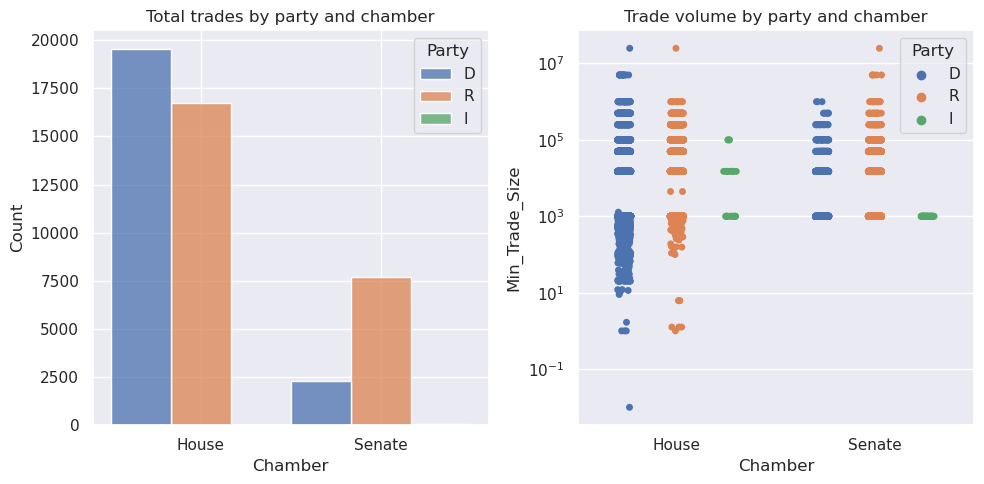

In [164]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
sns.histplot(stocks, x="Chamber", hue="Party", multiple="dodge")
plt.title("Total trades by party and chamber");
plt.subplot(122)
sns.stripplot(stocks, x="Chamber", hue="Party", y=(stocks["Min_Trade_Size"]), dodge=True);
plt.yscale("log")
plt.title("Trade volume by party and chamber");
plt.tight_layout();

Note that trades below $1000 happen in the House, but not the Senate. Most of these come from one person:

In [128]:
stocks[stocks["Min_Trade_Size"] <= 1000].Name.value_counts()

Name
Alan S. Lowenthal      390
Pete Sessions           16
David B. Mckinley       11
Mikie Sherrill          11
Peter Meijer            11
David A. Trott           6
Max Miller               5
Nancy Pelosi             3
Bob Gibbs                2
Susie Lee                2
Thomas Suozzi            1
Carol Devine Miller      1
David E. Price           1
William R. Keating       1
Steve Cohen              1
Keith J. Rothfus         1
Martha Roby              1
Name: count, dtype: int64

In [134]:
stocks[(stocks.Name == "Alan S. Lowenthal") & (stocks.Min_Trade_Size < 1000)]

,Ticker,TickerType,Company,Traded,Transaction,Subholding,Description,Name,Filed,Party,District,Chamber,Comments,excess_return,State,Min_Trade_Size,Max_Trade_Size
5125,CCK,ST,"CROWN HOLDINGS, INC.",2022-10-21,Sale,NEUBERGER BERMAN - MALUMED LOWENTHAL REV TRUS...,NaN,Alan S. Lowenthal,2022-10-29,D,CA47,House,NaN,-43.168212,California,999.64,999.64
11083,ADBE,ST,ADOBE INC.,2021-03-17,Purchase,NEUBERGER BERMAN - MALUMED LOWENTHAL REV TRUST,NaN,Alan S. Lowenthal,2021-03-28,D,CA47,House,NaN,-5.067565,California,898.16,898.16
11544,KTOS,ST,"KRATOS DEFENSE & SECURITY SOLUTIONS, INC.",2021-02-22,Sale,NEUBERGER BERMAN - MALUMED LOWENTHAL REV TRUST,NaN,Alan S. Lowenthal,2021-02-02,D,CA47,House,NaN,-69.717923,California,90.00,90.00
11561,AZN,ST,ASTRAZENECA PLC - AMERICAN DEPOSITARY SHARES,2021-02-22,Purchase,NEUBERGER BERMAN - BENEFICIARY IRA,NaN,Alan S. Lowenthal,2021-03-05,D,CA47,House,NaN,0.200897,California,962.54,962.54
12082,BSX,ST,BOSTON SCIENTIFIC CORPORATION,2021-02-02,Purchase,NEUBERGER BERMAN - BENEFICIARY IRA,NaN,Alan S. Lowenthal,2021-02-10,D,CA47,House,NaN,48.462594,California,330.51,330.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30682,AAPL,NaN,APPLE INC.,2018-01-02,Sale,NEUBERGER BERMAN - BENEFICIARY IRA,NaN,Alan S. Lowenthal,2018-01-09,D,CA47,House,NaN,235.512960,California,512.23,512.23
30684,MA,NaN,MASTERCARD INCORPORATED,2018-01-02,Sale,NEUBERGER BERMAN - BENEFICIARY IRA,NaN,Alan S. Lowenthal,2018-01-09,D,CA47,House,NaN,123.953652,California,152.12,152.12
33422,ZAYO,NaN,"ZAYO GROUP HOLDINGS, INC.",2017-05-11,Purchase,NEUBERGER BERMAN - TRADITIONAL IRA,"I BOUGHT SOME OF THIS STOCK YESTERDAY, 5/10/17.",Alan S. Lowenthal,2017-05-26,D,CA47,House,NaN,-16.258013,California,817.21,817.21
36442,SPY,NaN,SPDR S&P 500,2016-08-08,Purchase,NaN,NaN,Alan S. Lowenthal,2016-08-13,D,CA47,House,NaN,-0.400115,California,439.99,439.99


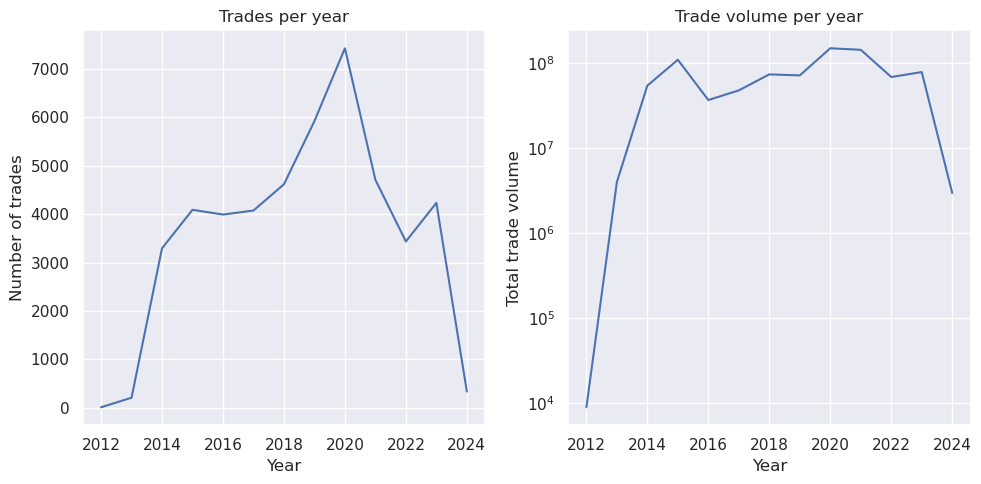

In [163]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
sns.lineplot(stocks.groupby(stocks.Traded.dt.year).count()["Traded"], ax=axs[0])
axs[0].set_xlabel("Year")
axs[0].set_ylabel("Number of trades")
axs[0].set_title("Trades per year")
sns.lineplot(stocks.groupby(stocks.Traded.dt.year)["Min_Trade_Size"].sum(), ax=axs[1])
axs[1].set_xlabel("Year")
axs[1].set_ylabel("Total trade volume")
axs[1].set_yscale("log")
axs[1].set_title("Trade volume per year");
plt.tight_layout();

We should probably ignore data from 2024 and 2012-2013 (when the system had just been implemented and people were probably still adjusting to it). In that case, the main thing that stands out above is the spike in number of trades during 2020.

Here are the same graphs but with *filing* dates:

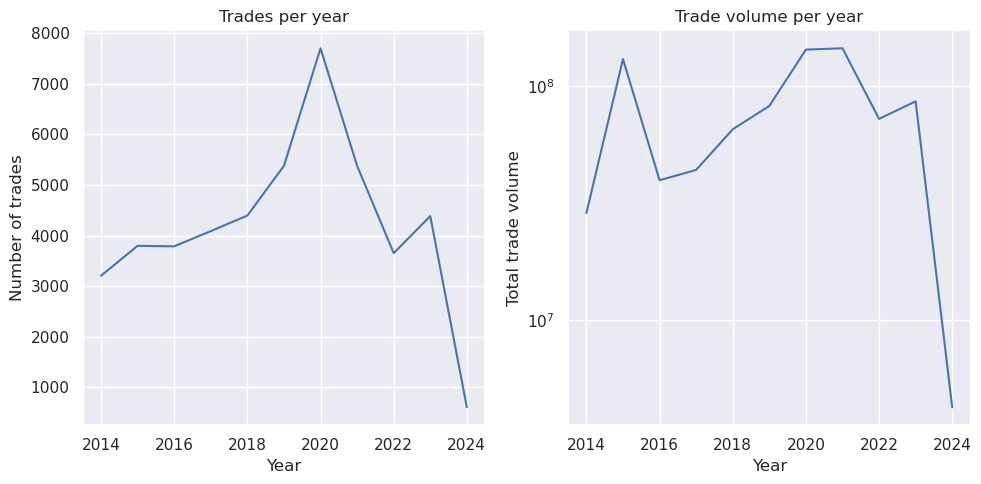

In [165]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
sns.lineplot(stocks.groupby(stocks.Filed.dt.year).count()["Filed"], ax=axs[0])
axs[0].set_xlabel("Year")
axs[0].set_ylabel("Number of trades")
axs[0].set_title("Trades per year")
sns.lineplot(stocks.groupby(stocks.Filed.dt.year)["Min_Trade_Size"].sum(), ax=axs[1])
axs[1].set_xlabel("Year")
axs[1].set_ylabel("Total trade volume")
axs[1].set_yscale("log")
axs[1].set_title("Trade volume per year");
plt.tight_layout();

So all trades from 2012 and 2013 were filed in 2014.

['MSFT', 'AAPL', 'AMZN', 'DIS', 'FB', 'JNJ', 'T', 'XOM', 'INTC', 'NVDA']


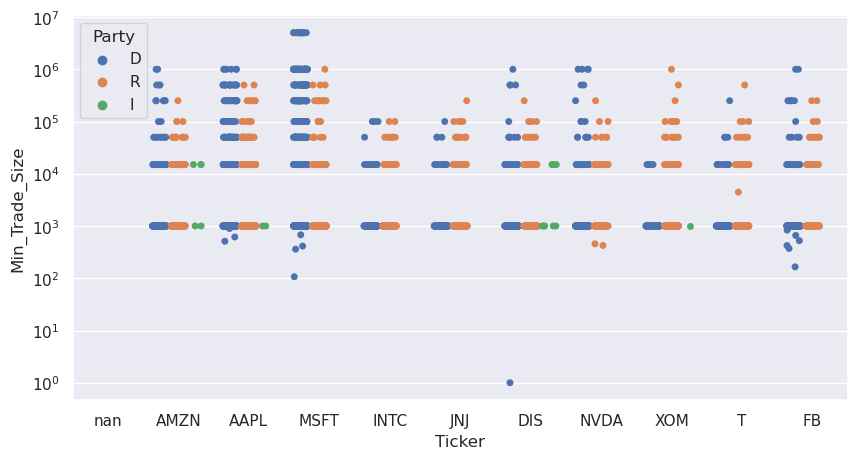

In [238]:
plt.figure(figsize=(10, 5))
freq_stocks = stocks.Ticker.value_counts()[:10].index.tolist()
print(freq_stocks)
sns.stripplot(data=stocks[stocks.Ticker.isin(freq_stocks)], x="Ticker", hue="Party",
              y=(stocks["Min_Trade_Size"]), dodge=True, jitter=0.3)
plt.yscale("log");  # No clue where the nan is coming from

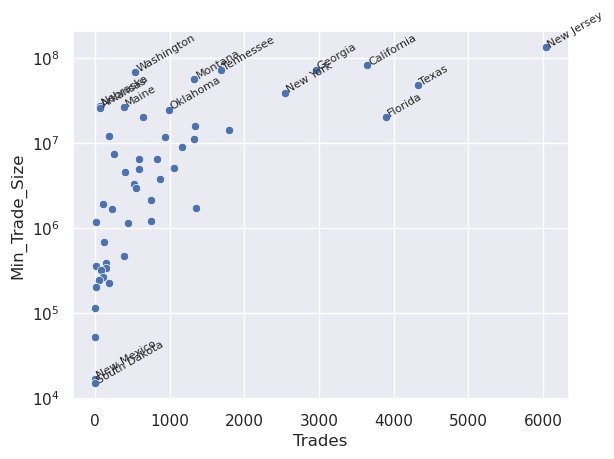

In [227]:
states = pd.concat([
    stocks.groupby("State")["Ticker"].count(),
    stocks.groupby("State")["Min_Trade_Size"].sum()
], axis=1).rename(columns={"Ticker": "Trades"}).sort_values(by="Min_Trade_Size", ascending=False)
states
ax = sns.scatterplot(states, x="Trades", y="Min_Trade_Size")
ax.set_yscale("log")
for row in states.iloc[:13].iterrows():
    ax.text(row[1]["Trades"], row[1]["Min_Trade_Size"], row[0], size=8, rotation=30)
for row in states.iloc[-2:].iterrows():
    ax.text(row[1]["Trades"], row[1]["Min_Trade_Size"], row[0], size=8, rotation=30)
                  